In [133]:
import pandas as pd
import numpy as np
file = pd.read_csv('DirectMarketing.csv')

In [134]:
file.shape
file.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


Load the data and check for NA in the file. 

In [135]:
file.isna().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

Column History has 303 NA's. Let us now check the values in that column

In [136]:
file['History'].value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [137]:
file['History'].value_counts(normalize = True)

High      0.365854
Low       0.329986
Medium    0.304161
Name: History, dtype: float64

Filter all the rows with NA, to check if there are any anomalies or to identify the way to replace the NA.

In [138]:
file[file.isnull().any(axis=1)]

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
9,Old,Male,Own,Married,Far,80700,0,NaN,18,3034
10,Young,Male,Rent,Married,Close,43700,1,NaN,12,927
15,Middle,Female,Own,Married,Far,83100,1,NaN,12,2766
24,Young,Female,Rent,Married,Close,41700,1,NaN,6,521
26,Middle,Male,Own,Single,Close,62800,3,NaN,6,707
...,...,...,...,...,...,...,...,...,...,...
990,Middle,Male,Own,Married,Close,123800,2,NaN,18,3537
992,Middle,Male,Own,Married,Close,101700,1,NaN,6,941
994,Young,Male,Rent,Single,Close,17600,0,NaN,6,273
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384


Fill the NA in column "History" with the help of column 'Age'. Group the columns Age and History and identify the value which occurs the most for each category in Age. Replace the NA in column 'History' based on the values obtained after grouping the data

In [139]:
file['History'] = file.groupby(['Age'], sort=False)['History'].apply(lambda x: x.fillna(x.mode().iloc[0]))

## Univariate Analysis

In [140]:
import matplotlib.pyplot as plt


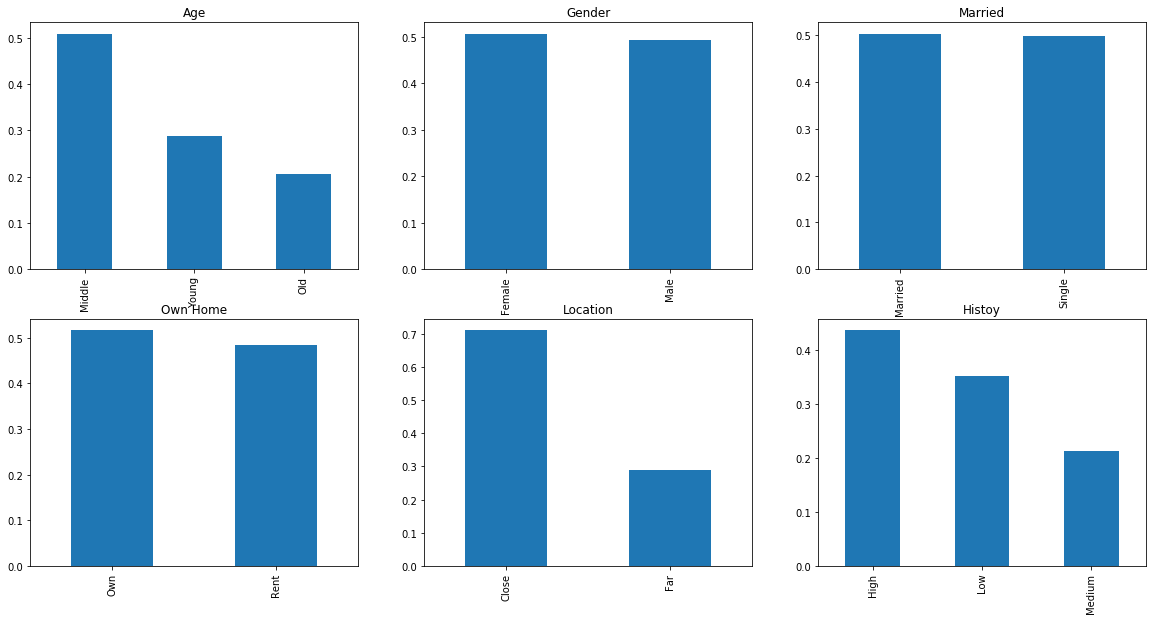

In [141]:
plt.figure(1)
plt.subplot(2,3,1)
file['Age'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Age') 
plt.subplot(2,3,2)
file['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender') 
plt.subplot(2,3,3)
file['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(2,3,4)
file['OwnHome'].value_counts(normalize=True).plot.bar(title= 'Own Home')
plt.subplot(2,3,5)
file['Location'].value_counts(normalize=True).plot.bar(title= 'Location')
plt.subplot(2,3,6)
file['History'].value_counts(normalize=True).plot.bar(title= 'Histoy') 
plt.show()

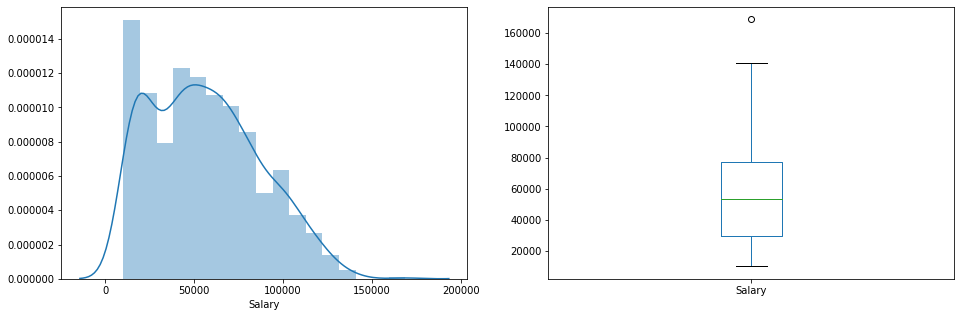

In [142]:
import seaborn as sns

plt.figure(1)
plt.subplot(121)
sns.distplot(file['Salary'])
plt.subplot(122)
file['Salary'].plot.box(figsize = (16,5))


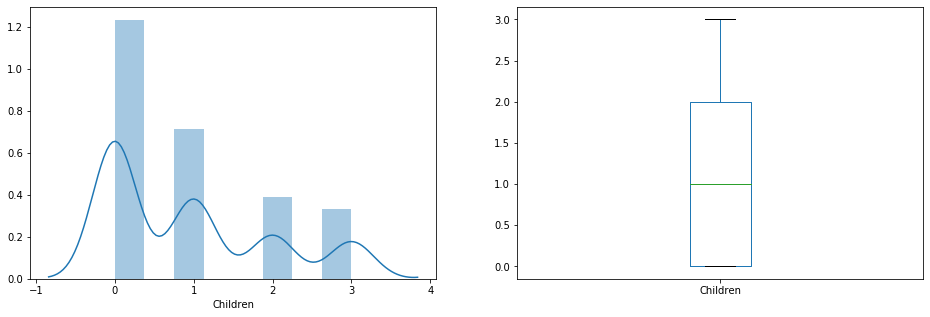

In [143]:
plt.figure(1)
plt.subplot(121)
sns.distplot(file['Children'])
plt.subplot(122)
file['Children'].plot.box(figsize = (16,5))


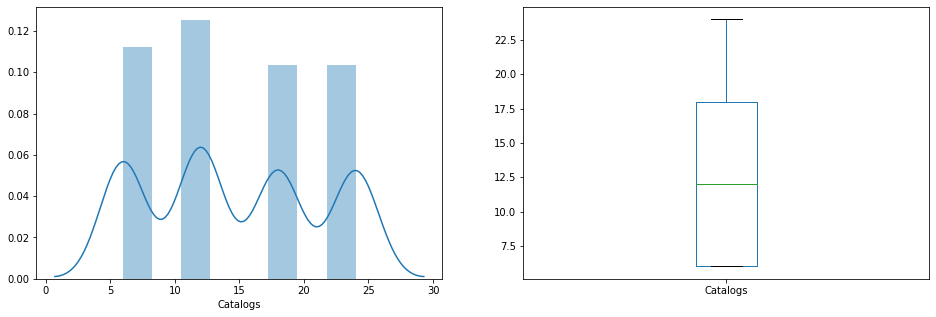

In [144]:
plt.figure(1)
plt.subplot(121)
sns.distplot(file['Catalogs'])
plt.subplot(122)
file['Catalogs'].plot.box(figsize = (16,5))


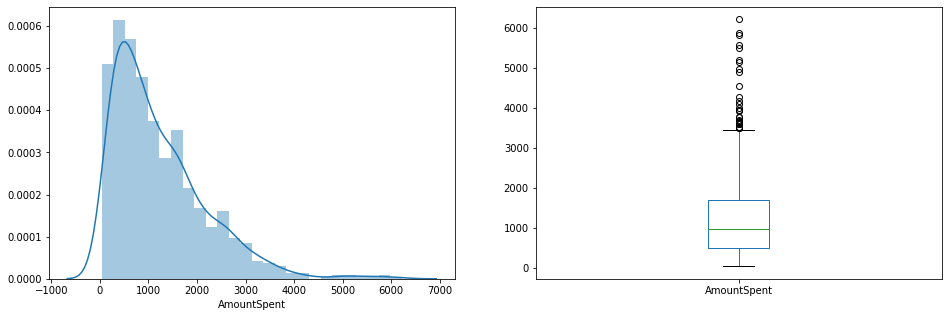

In [145]:
plt.figure(1)
plt.subplot(121)
sns.distplot(file['AmountSpent'])
plt.subplot(122)
file['AmountSpent'].plot.box(figsize = (16,5))


### Bivariate Analysis

### Age
Let us now view the column 'Age' in detail to identify the amount spent details.

In [146]:
pd.pivot_table(file, index = ['Age','History'], values = 'AmountSpent', aggfunc=np.sum)

AmountSpent
Age    History             
Middle High          610344
       Low            27813
       Medium        124702
Old    High          230945
       Low            16462
       Medium         46179
Young  High           12792
       Low           116929
       Medium         30604

In [147]:
pd.pivot_table(file, index = ['Age','History'], values = 'AmountSpent', aggfunc=[np.mean,len])

mean         len
                AmountSpent AmountSpent
Age    History                         
Middle High     1956.230769         312
       Low       403.086957          69
       Medium    981.905512         127
Old    High     1973.888889         117
       Low       433.210526          38
       Medium    923.580000          50
Young  High     1827.428571           7
       Low       477.261224         245
       Medium    874.400000          35

### Gender

Gender is used for analysis of Amount spent. There is not much difference on the average spent by gender. However, on further analysis, we could see that the number of customers with Low History is more in the female than male and High History is more in male that female.

In [148]:
pd.pivot_table(file, index = ['Gender', 'History'], values = 'AmountSpent', aggfunc=np.sum)

AmountSpent
Gender History             
Female High          328451
       Low            98379
       Medium         91992
Male   High          525630
       Low            62825
       Medium        109493

In [149]:
pd.pivot_table(file, index = ['Gender', 'History'], values = 'AmountSpent', aggfunc=[np.mean,len])

mean         len
                AmountSpent AmountSpent
Gender History                         
Female High     1898.560694         173
       Low       425.883117         231
       Medium    901.882353         102
Male   High     1998.593156         263
       Low       519.214876         121
       Medium    995.390909         110

### Own home

1.Customers with own home are more in category High and their average spending is high too.
2.Average spending is in same level for Low and Medium categories.

In [150]:
pd.pivot_table(file, index = ['OwnHome', 'History'], values = 'AmountSpent', aggfunc=np.sum)

AmountSpent
OwnHome History             
Own     High          647362
        Low            44251
        Medium        104645
Rent    High          206719
        Low           116953
        Medium         96840

In [151]:
pd.pivot_table(file, index = ['OwnHome', 'History'], values = 'AmountSpent', aggfunc=[np.mean,len])

mean         len
                 AmountSpent AmountSpent
OwnHome History                         
Own     High     2035.729560         318
        Low       497.202247          89
        Medium    960.045872         109
Rent    High     1751.855932         118
        Low       444.688213         263
        Medium    940.194175         103

### Married

1.Married people are more in category High 
2.Single customers are more in category Low.

In [152]:
pd.pivot_table(file, index = ['Married', 'History'], values = 'AmountSpent', aggfunc=np.sum)

AmountSpent
Married History             
Married High          671393
        Low            61698
        Medium        106288
Single  High          182688
        Low            99506
        Medium         95197

In [153]:
pd.pivot_table(file, index = ['Married', 'History'], values = 'AmountSpent', aggfunc=[np.mean,len])

mean         len
                 AmountSpent AmountSpent
Married History                         
Married High     2208.529605         304
        Low       717.418605          86
        Medium    949.000000         112
Single  High     1384.000000         132
        Low       374.082707         266
        Medium    951.970000         100

### Location

1.Customers who are in close by location are more in number.
2.Average spending is high with respect to customers who are in far locations

In [154]:
pd.pivot_table(file, index = ['Location', 'History'], values = 'AmountSpent', aggfunc=np.sum)

AmountSpent
Location History             
Close    High          483007
         Low           115685
         Medium        155105
Far      High          371074
         Low            45519
         Medium         46380

In [155]:
pd.pivot_table(file, index = ['Location', 'History'], values = 'AmountSpent', aggfunc=[np.mean,len])

mean         len
                  AmountSpent AmountSpent
Location History                         
Close    High     1750.025362         276
         Low       433.277154         267
         Medium    928.772455         167
Far      High     2319.212500         160
         Low       535.517647          85
         Medium   1030.666667          45

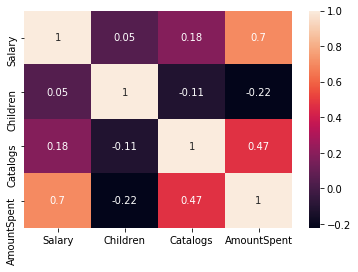

### Preprocessing data

Convert all the categorical columns to numerical columns using labelencoder

In [159]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Age','Gender', 'OwnHome','Married','Location','History']

for c in cat_cols:
    file[c]= LabelEncoder().fit_transform(file[c])

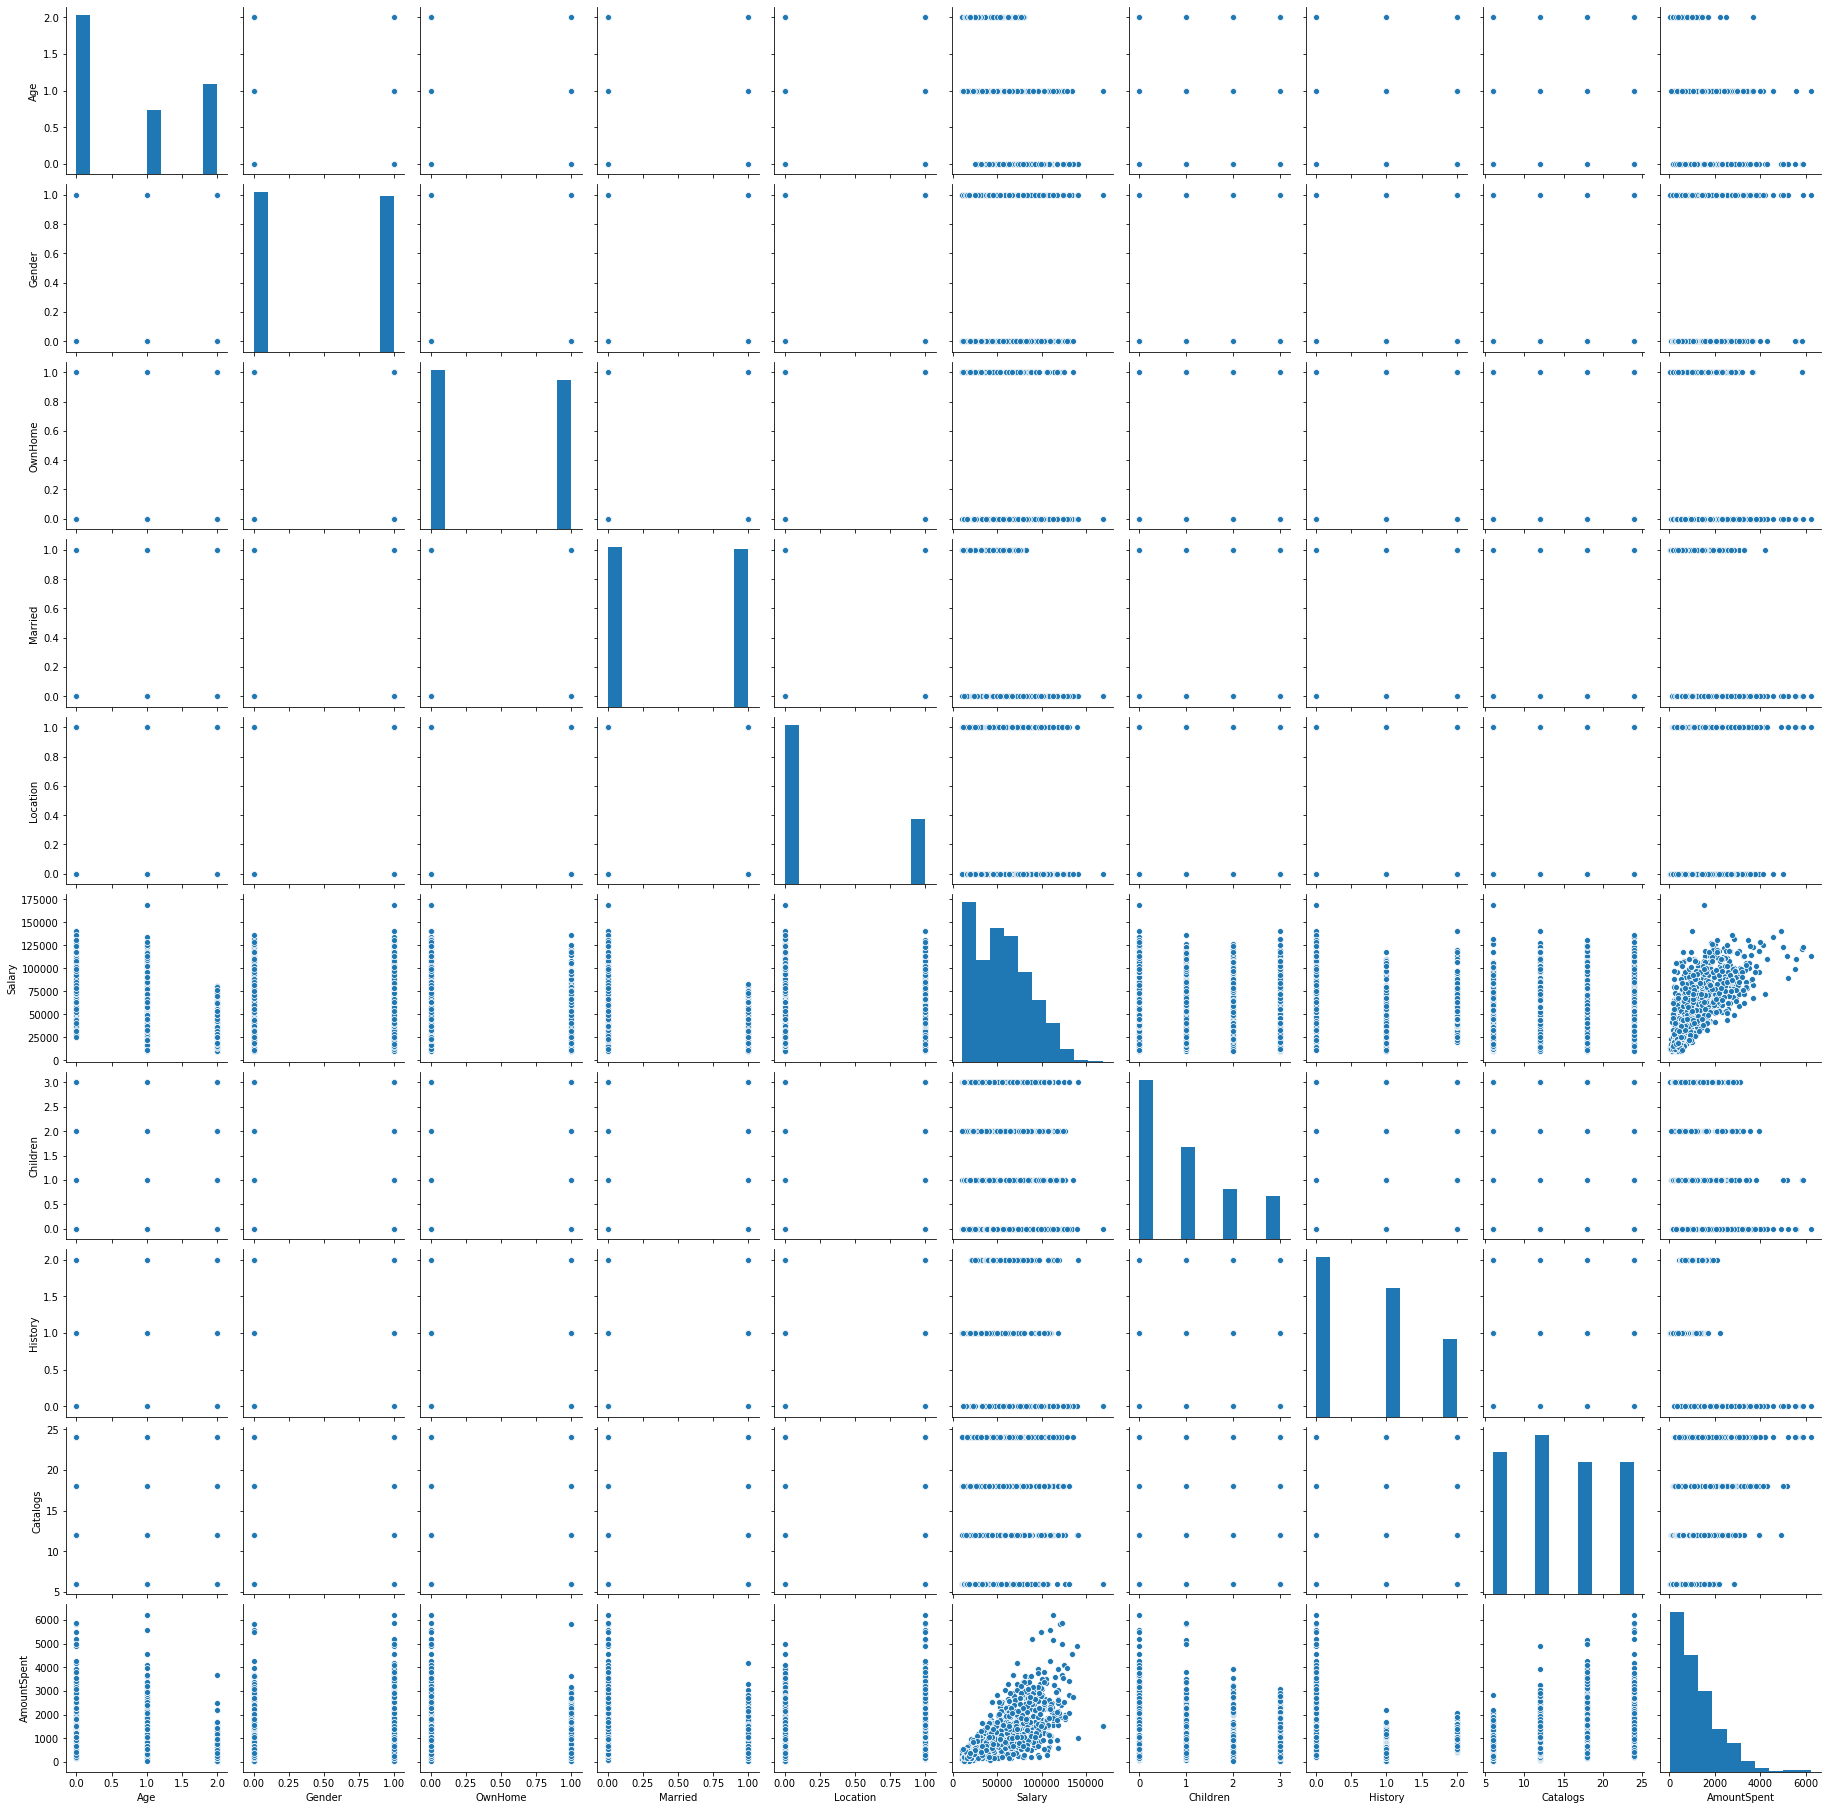

In [162]:
sns.pairplot(file)

Relationship between Amount spent and other fields.

1.Salary = 0.7
2.Catalogs = 0.5
3.History = -0.5
4.Married = -0.5
5.Own Home = -0.4
6.Age = -0.4



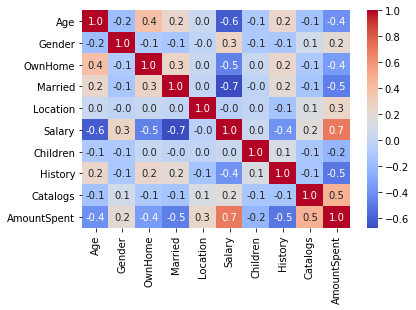

In [161]:
t = file.corr()

sns.heatmap(t, cmap='coolwarm', annot=True, fmt=".1f")

Split the data into train and test

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X= file.drop('AmountSpent', axis =1)
y = file['AmountSpent']

scale = StandardScaler().fit_transform(X)
X = pd.DataFrame(scale, columns=X.columns)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

def model_details(model,name,X_train = X_train,y_train = y_train,X_test = X_test,y_test = y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    table = pd.DataFrame({'Model' :[name],
                          'RMSE' :[np.sqrt(mean_squared_error(y_test,y_pred))],
                          })

    return table

### Model Building

In [183]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)

model_LR_predict = model_LR.predict(X_test)


In [224]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)

X_train_poly_2 = poly_reg.fit_transform(X_train)
X_test_poly_2 = poly_reg.fit_transform(X_test)
model_PR_2 = LinearRegression()
model_PR_2.fit(X_train_poly,y_train)

model_PR_2_predict = model_PR_2.predict(X_test_poly)

In [198]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)

X_train_poly_3 = poly_reg.fit_transform(X_train)
X_test_poly_3 = poly_reg.fit_transform(X_test)
model_PR_3 = LinearRegression()
model_PR_3.fit(X_train_poly,y_train)

model_PR_3_predict = model_PR_3.predict(X_test_poly)

In [229]:
from sklearn.svm import SVR
model_SVR = SVR(kernel = 'rbf')

model_SVR.fit(X_train, y_train)
model_SVR_predict = model_SVR.predict(X_test)

In [215]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, y_train)

model_DT_predict = model_DT.predict(X_test)

importance = model_DT.feature_importances_
feat_imp = pd.DataFrame({'Columns': X.columns,
                         'Imp' : importance})
feat_imp

,Columns,Imp
0,Age,0.008905
1,Gender,0.012124
2,OwnHome,0.006816
3,Married,0.005707
4,Location,0.047844
5,Salary,0.294420
6,Children,0.050981
7,History,0.464408
8,Catalogs,0.108795


In [222]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_estimators = 100, random_state = 111)
model_RF.fit(X_train, y_train)

model_RF_predict = model_RF.predict(X_test)

In [233]:
model_1 = model_details(model_LR, 'Linear Regression')
model_2 = model_details(model_PR_2, 'Polynomial Regression (2)',X_train = X_train_poly_2, X_test = X_test_poly_2)
model_3 = model_details(model_PR_3, 'Polynomial Regression (3)',X_train = X_train_poly_3, X_test = X_test_poly_3)
model_4 = model_details(model_SVR, 'SVR')
model_5 = model_details(model_DT, 'Decision Tree')
model_6 = model_details(model_RF, 'Random Forest')

final_table = pd.concat([model_1,model_2,model_3, model_4, model_5, model_6], axis =0)
final_table

,Model,RMSE
0,Linear Regression,490.418837
0,Polynomial Regression (2),403.508758
0,Polynomial Regression (3),432.291234
0,SVR,944.978308
0,Decision Tree,563.816508
0,Random Forest,432.794505
